Naive Bayes Accuracy: 0.6998191681735986
KNN Accuracy: 0.786618444846293
Naive Bayes Specificity: 0.9240506329113924
KNN Specificity: 0.9493670886075949


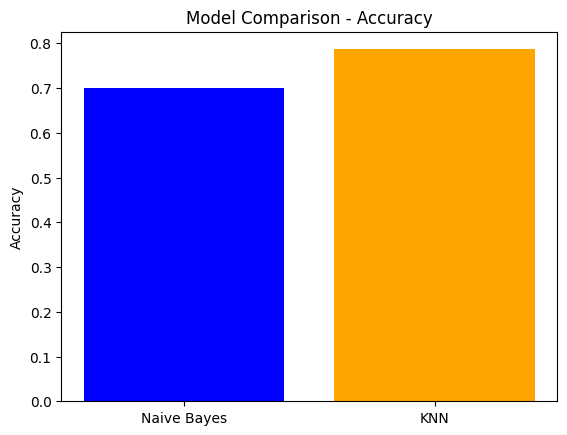

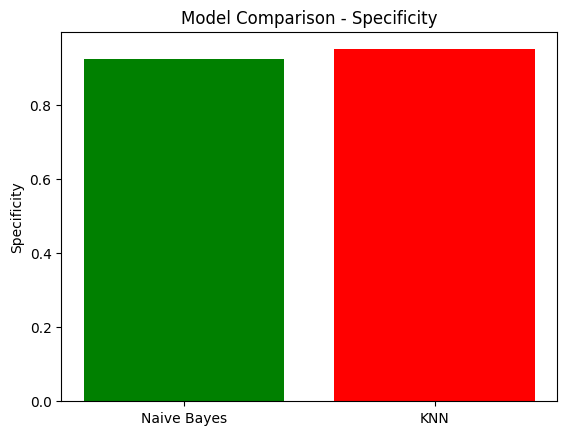

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

# Load the dataset
url = "C:/Users/Harshana B/Desktop/air/air_pollution_data_1.csv"  
df = pd.read_csv(url)

# Extract features and target
X = df[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']]
y = df['aqi']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
nb_predictions = naive_bayes_model.predict(X_test)

# Train KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Evaluate models
nb_accuracy = metrics.accuracy_score(y_test, nb_predictions)
knn_accuracy = metrics.accuracy_score(y_test, knn_predictions)

# Calculate specificity for both models
nb_conf_matrix = metrics.confusion_matrix(y_test, nb_predictions)
knn_conf_matrix = metrics.confusion_matrix(y_test, knn_predictions)

nb_specificity = nb_conf_matrix[0, 0] / (nb_conf_matrix[0, 0] + nb_conf_matrix[0, 1])
knn_specificity = knn_conf_matrix[0, 0] / (knn_conf_matrix[0, 0] + knn_conf_matrix[0, 1])

# Print accuracy and specificity
print("Naive Bayes Accuracy:", nb_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Naive Bayes Specificity:", nb_specificity)
print("KNN Specificity:", knn_specificity)

# Plot comparison graph
labels = ['Naive Bayes', 'KNN']
accuracies = [nb_accuracy, knn_accuracy]
specificities = [nb_specificity, knn_specificity]

plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.show()

plt.bar(labels, specificities, color=['green', 'red'])
plt.ylabel('Specificity')
plt.title('Model Comparison - Specificity')
plt.show()
